In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [2]:
df = pd.read_csv(r'C:\Users\ibrahim\003- AB Testing\data\marketing_AB.csv')

In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [5]:
# chek duplicate columns
df.duplicated(subset=None).sum()

0

In [6]:
# drop unwanted columns
del df['Unnamed: 0'], df['user id']

In [7]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [8]:
# check categorical columns
df_cat = df[['test group', 'converted', 'most ads day','most ads hour']]

In [9]:
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [10]:
# unique
for i in df_cat.columns:
    print(i.upper(),':', df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


## Univariat Analysis

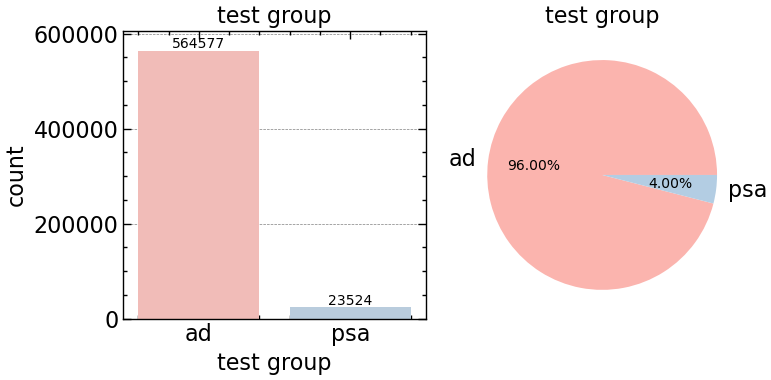

In [11]:
plt.style.use(['science','notebook','grid'])

variable = 'test group'

# countplot
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

ax = sns.countplot(x = variable, data = df_cat, palette= 'Pastel1')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width() /2,
            y = height + 5000, 
            s = '{:.0f}'.format(height),
            ha = 'center'
           )
plt.title(variable)
plt.ylim(0,605000)


# piechart

plt.subplot(1,2,2)
counts = df_cat['test group'].value_counts()
colors = sns.color_palette('Pastel1')
plt.pie(counts, colors = colors,labels = counts.index, autopct = '%0.2f%%')
plt.title(variable)

# adjust layout
plt.tight_layout()

# show plot
plt.show()

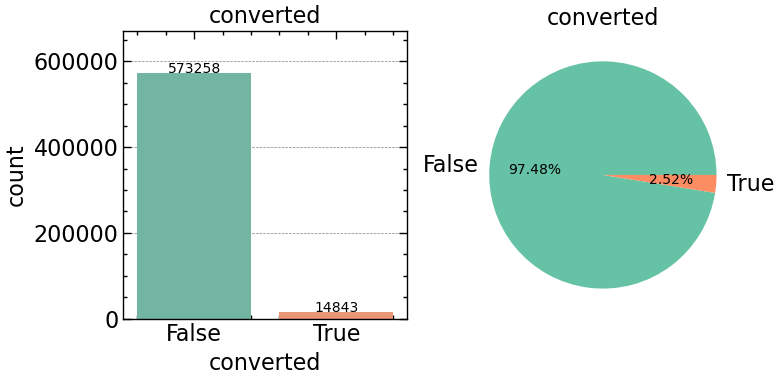

In [12]:
variable = 'converted'

# countplot
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

ax = sns.countplot(x= variable, data = df_cat, palette= 'Set2')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2,
            y = height + 500,
            s = '{:.0f}'.format(height),
            ha = 'center'
           )
plt.title(variable)
plt.ylim(0, 670000)

# piecart

plt.subplot(1,2,2)
counts = df_cat['converted'].value_counts()
colors = sns.color_palette('Set2')
plt.pie(counts, colors = colors,labels = counts.index, autopct='%0.2f%%')
plt.title(variable)

# adjust layout
plt.tight_layout()

# show
plt.show()

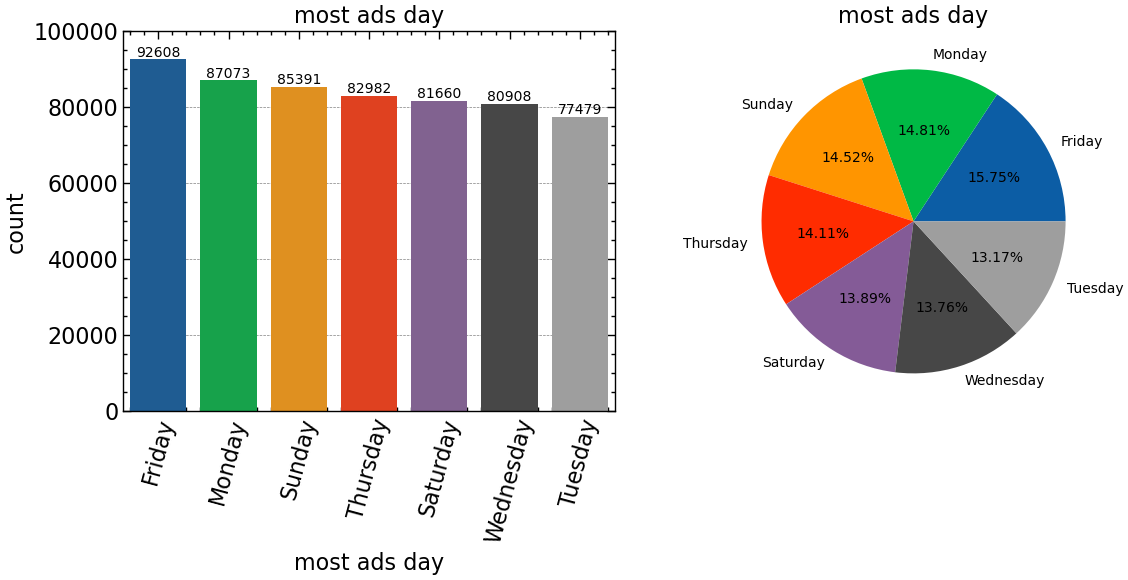

In [13]:
variable = 'most ads day'

# countplot

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)

ax = sns.countplot(x = variable, data = df_cat, order = df_cat['most ads day'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width() /2, 
            y = height + 700, 
            s = '{:.0f}'.format(height),
            ha = 'center',
            size = 10
           )
plt.title(variable)
plt.xticks(rotation=75)
plt.ylim(0, 100000)

# pie chart
plt.subplot(1,2,2)
counts = df_cat['most ads day'].value_counts()
plt.pie(counts, labels = counts.index,autopct= '%0.2f%%',textprops={'fontsize': 10})

plt.title(variable)

# adjust layout
plt.tight_layout()


# show
plt.show()

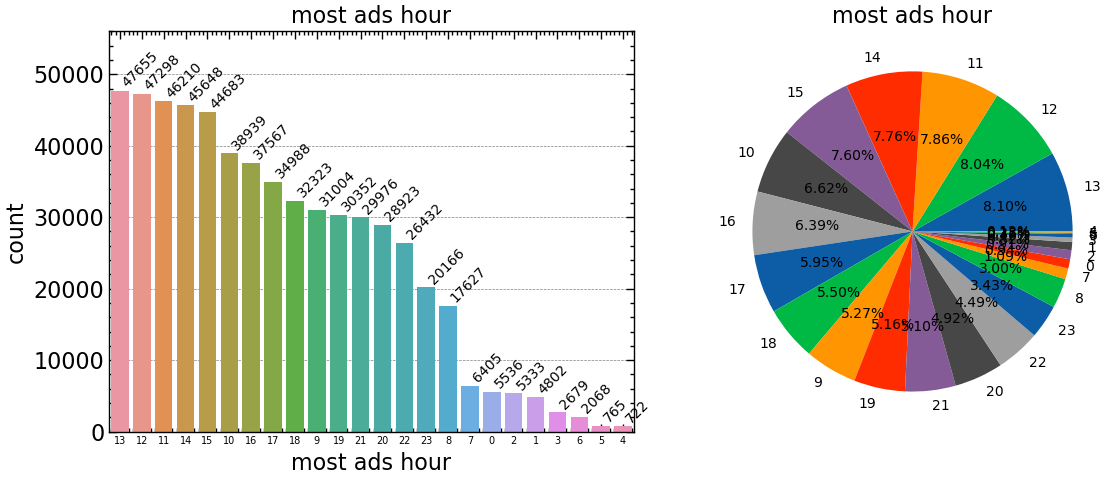

In [14]:
variable = 'most ads hour'

# countplot
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)

ax = sns.countplot(x = variable, data = df_cat, order = df_cat['most ads hour'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height + 500,
            s = '{:.0f}'.format(height),
            ha = 'left',
            size = 10,
            rotation = 45
           )
plt.title(variable)
plt.xticks(rotation = 0, size = 7)
plt.ylim(0,56000)
    
    
# piechart

plt.subplot(1,2,2)
counts = df_cat['most ads hour'].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%', textprops ={'fontsize' : 10})
plt.title(variable)

# adjust layout
plt.tight_layout()
# show
plt.show()


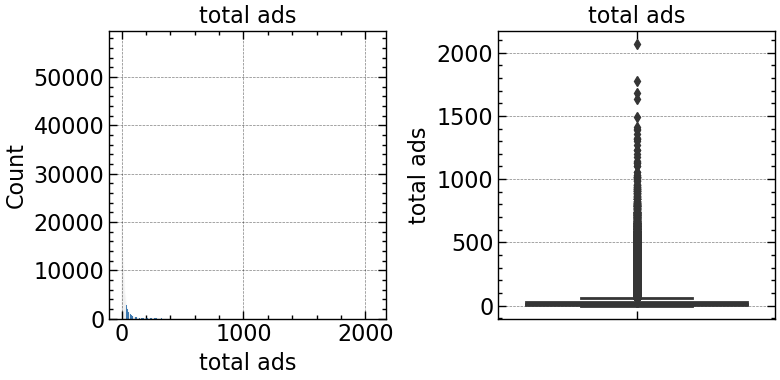

In [15]:
variable = 'total ads'

# histogram
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

sns.histplot(x=variable, data= df)
plt.title(variable)

# boxplot
plt.subplot(1,2,2)
sns.boxplot(y=variable, data= df)
plt.title(variable)


plt.tight_layout()
plt.show()

In [16]:
# describe
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

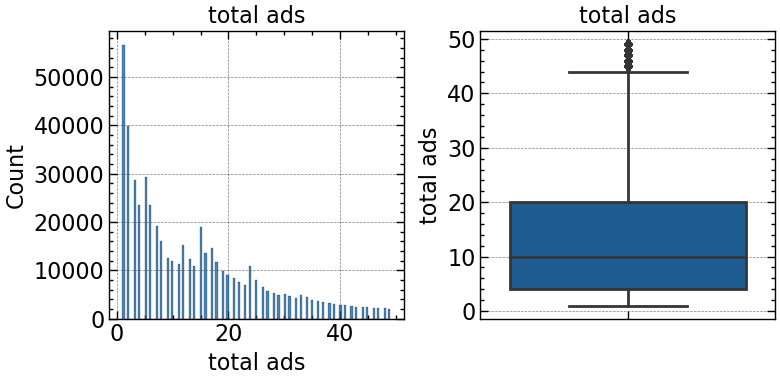

In [17]:
variable = 'total ads'
 
# histogram
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(x=variable , data= df[df['total ads'] < 50])
plt.title(variable)

# boxplot
plt.subplot(1,2,2)
sns.boxplot(y= variable , data = df[df['total ads'] < 50])
plt.title(variable)

plt.tight_layout()

plt.show()

In [18]:
# crostab
ct_converted_test_group = pd.crosstab(df['test group'], df['converted'],normalize='index')
ct_converted_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


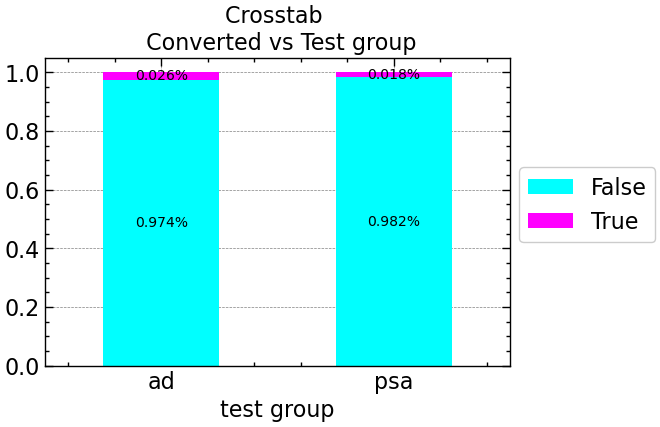

In [19]:
ax = ct_converted_test_group.plot.bar(stacked=True, cmap='cool', figsize=(6,4))

for c in ax.containers:
    labels = [str(round(v.get_height(), 3)) + '%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, 
            label_type ='center',
            labels = labels            
           )
plt.xticks(rotation=0)
plt.legend(loc=(1.02, 0.4))
plt.title('Crosstab \n Converted vs Test group')
plt.show()

In [20]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [21]:
ct_converted_most_ads_day = pd.crosstab(df['most ads day'], df['converted'], normalize='index')
ct_converted_most_ads_day_sort = ct_converted_most_ads_day.sort_values(by=True, ascending=False)
ct_converted_most_ads_day_sort

converted,False,True
most ads day,,
Monday,0.967188,0.032812
Tuesday,0.970160,0.029840
Wednesday,0.975058,0.024942
Sunday,0.975524,0.024476
Friday,0.977788,0.022212
Thursday,0.978429,0.021571
Saturday,0.978949,0.021051


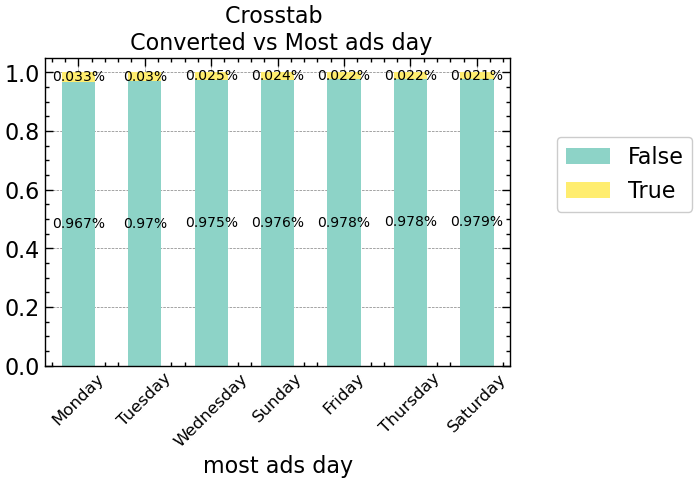

In [22]:
ax = ct_converted_most_ads_day_sort.plot.bar(stacked= True, cmap='Set3', figsize=(6,4))

for c in ax.containers:
    labels = [str(round(v.get_height(), 3)) + '%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, 
                 label_type= 'center',
                 labels = labels,
                 size = 10
                )
plt.xticks(rotation = 45, size =12)
plt.title('Crosstab \n Converted vs Most ads day')
plt.legend(loc=(1.1, 0.5))
plt.show()

In [23]:
ct_converted_most_ads_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize= 'index')
ct_converted_most_ads_hour_sort = ct_converted_most_ads_hour.sort_values(by=True, ascending=False)
ct_converted_most_ads_hour_sort

converted,False,True
most ads hour,,
16,0.969228,0.030772
20,0.970197,0.029803
15,0.970347,0.029653
21,0.971077,0.028923
17,0.971790,0.028210
14,0.971937,0.028063
18,0.972620,0.027380
19,0.973280,0.026720
22,0.973895,0.026105


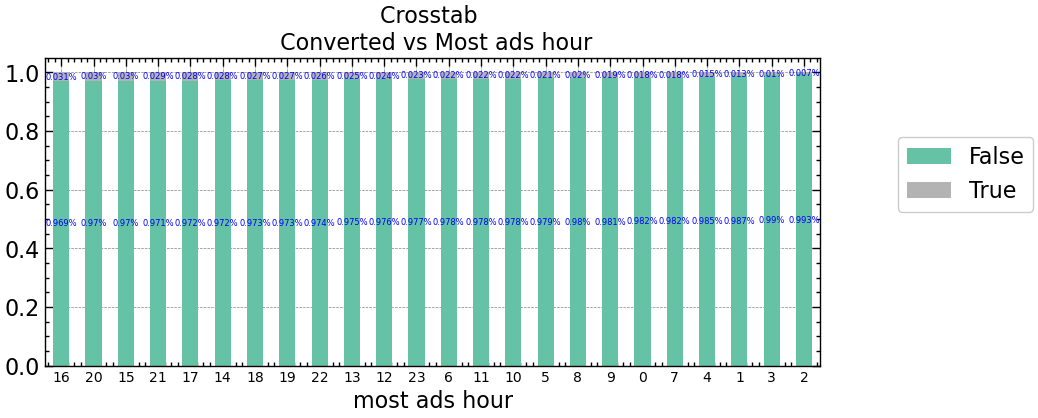

In [24]:
ax = ct_converted_most_ads_hour_sort.plot.bar(stacked= True, cmap='Set2', figsize=(10,4))

for c in ax.containers:
    labels = [str(round(v.get_height(),3)) + '%' if v.get_height() > 0 else '' for v in c ]
    ax.bar_label(c, 
                 label_type = 'center',
                 labels =labels,
                 size= 6,
                 color= 'blue'
                )
plt.xticks(rotation=0, size =10)
plt.title('Crosstab \n Converted vs Most ads hour')
plt.legend(loc=(1.1, 0.5))
plt.show()

In [25]:
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


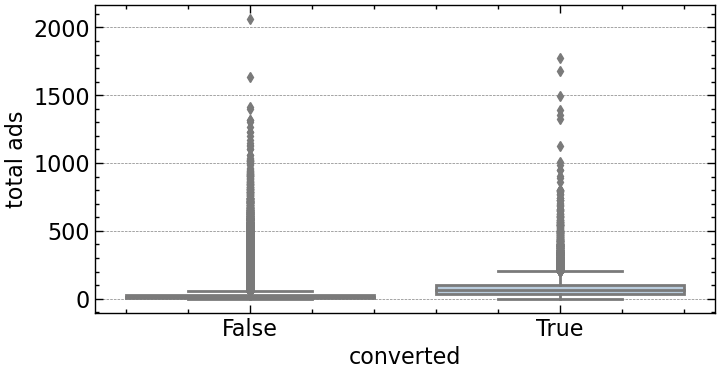

In [26]:
plt.figure(figsize=(8,4))

sns.boxplot(x='converted', y='total ads', data = df,palette ='Pastel1');

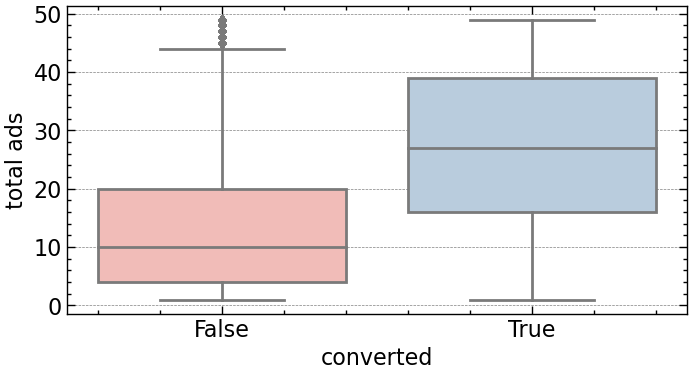

In [27]:
plt.figure(figsize=(8,4))

sns.boxplot(x='converted', y='total ads', data = df[df['total ads'] < 50], palette='Pastel1');

## Statistic Test

In [28]:
from scipy.stats import chi2_contingency

alpha = 0.05
for variable in df_cat.columns:
    if variable != 'converted':
        
        # create continegncy table
        contingency_table = pd.crosstab(df[variable],df['converted'])
        
        # chi squared
        chi, p, _, _ = chi2_contingency(contingency_table)
        
        # display result
        print(f'\nChi squared test from {variable} vs Converted')
        print(f'Chi squared value : {chi}')
        print(f'P-Value : {p}')
        
        # check significant
        if p < alpha:
            print(f'H0 is rejected ==> visible differences between the two group')
        else:
            print(f'H0 is accepted (H1) ==> No differences were seen between data group')


Chi squared test from test group vs Converted
Chi squared value : 54.005823883685245
P-Value : 1.9989623063390075e-13
H0 is rejected ==> visible differences between the two group

Chi squared test from most ads day vs Converted
Chi squared value : 410.0478857936585
P-Value : 1.932184379244731e-85
H0 is rejected ==> visible differences between the two group

Chi squared test from most ads hour vs Converted
Chi squared value : 430.76869230822086
P-Value : 8.027629823696771e-77
H0 is rejected ==> visible differences between the two group


In [31]:
from scipy.stats import shapiro, levene, mannwhitneyu, ttest_ind

# step 1:
# check assumption
# normality assumption

shapiro_stats_true, shapiro_p_value_true = shapiro(df[df['converted']==True]['total ads'])
shapiro_stats_false, shapiro_p_value_false = shapiro(df[df['converted']==False]['total ads'])

print(f'Shapiro-Wilk test for normality (True group) :p-value = {shapiro_p_value_true}')
print(f'Shapiro-Wilk test for normality (False group) :p-value = {shapiro_p_value_false}')

# equality of variances assumption
levene_stats, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene's test equality of variances  : p-value = {levene_p_value}")

Shapiro-Wilk test for normality (True group) :p-value = 0.0
Shapiro-Wilk test for normality (False group) :p-value = 0.0
Levene's test equality of variances  : p-value = 0.0


In [32]:
# step 2:
# performent suitable test

alpha = 0.05

if shapiro_stats_true > alpha and shapiro_stats_false > alpha and levene_p_value > alpha :
    # assumption met use t-test mean
    t_test, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f'Indipendent two-sample t-test = {t_p_value}')
else:
    # if assumption not met - use Mann Whitney U test median
    u_stats, u_p_stats = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f'Mann White U test: p-value = {u_p_stats}')

Mann White U test: p-value = 0.0
